# Record with OUSTER LIDAR 

### 1) TO start select box/section under and press SHIFT+ENTER or click the play button on the left! 

2) You will then see a timer in the box showing that the box/section is running and the box selection moves to the next box 
3) Then just do the same on the following steps until the end 

In [6]:
# TO start select this box and press SHIFT+ENTER or click the play button on the left

# Imports 
from ouster import client, pcap
import matplotlib.pyplot as plt
from more_itertools import nth
from more_itertools import time_limited
from datetime import datetime

In [13]:
# Sensor configuration

os_ip_address = '10.10.40.2'
path_to_store_data = './data'


config = client.SensorConfig()
config.udp_port_lidar = 7502
config.udp_port_imu = 7503
config.operating_mode = client.OperatingMode.OPERATING_NORMAL
config.lidar_mode = client.LidarMode.MODE_1024x10
config.azimuth_window = (135000, 225000)

client.set_config(os_ip_address, config, persist=True, udp_dest_auto = True)


In [8]:
# Connect to sensor

source = client.Sensor(os_ip_address, 7502, 7503, buf_size=640)
# source = client.Sensor(os_ip_address, 7502, 7503)
source.metadata


[2023-07-02 14:44:07.502] [ouster::sensor] [info] initializing sensor: 10.10.40.2 with lidar port/imu port: 7502/7503


<ouster.client.SensorInfo OS-1-128 122141001098 v2.5.1 1024x10>

## Check Sensor view 

You can run this multiple times until sensor is mounted for a good viewing angel   

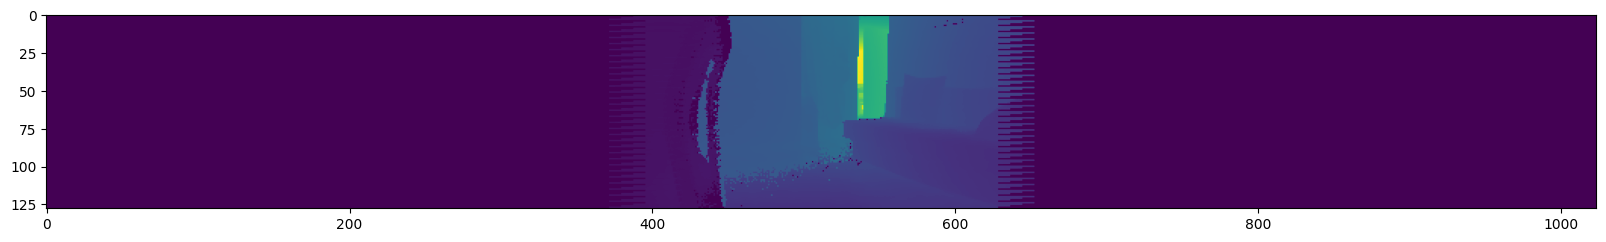

In [10]:
scans = client.Scans(source)

# iterate `scans` and get the 10th LidarScan 
scan = nth(scans, 10)
ranges = scan.field(client.ChanField.RANGE)

ranges_destaggered = client.destagger(source.metadata, ranges)

plt.figure(figsize = (20,6))
# cmap: gray, viridis, plasma, inferno, magma, cividis
plt.imshow(ranges_destaggered, cmap='viridis', resample=False)

**Image angel check:**

The image output should show a 45 degree angel image just under the 600 x-axis marker. Tte rest of the image should be dark color as the sensor is configured to only record a 45 degree angle, if more is visible the configurations was not accepted by the sensor. 

**Object in view?**

If everything looks allrigt then proceed to next section to start the recoding 

## Rerecord sensor data

 **!!! CHECK RECORD_MAX_MINUTES IS ENUGU !!!**

 You can allays stop early by pressing the STOP button to the left (You will see a error message, it can be ignored!)

 To start a new recording just press play on the left 

In [15]:

RECORD_MAX_MINUTES = 1 # Minutes to record as MAX time length


# make a descriptive filename for metadata/pcap files
time_part = datetime.now().strftime("%Y%m%d_%H%M%S")
meta = source.metadata
fname_base = f"{path_to_store_data}/{meta.prod_line}_{meta.mode}_{time_part}"

print(f"Saving sensor metadata to: {fname_base}.json")
source.write_metadata(f"{fname_base}.json")

print(f"Writing to: {fname_base}.pcap (Ctrl-C to stop early)")
n_seconds = RECORD_MAX_MINUTES * 60
source_it = time_limited(n_seconds, source)

# sensor pcap records to get lidar/imu packets
n_packets = pcap.record(source_it, f"{fname_base}.pcap")

print(f"Captured {n_packets} packets")

Saving sensor metadata to: ./data/OS-1-128_1024x10_20230702_145537.json
Writing to: ./data/OS-1-128_1024x10_20230702_145537.pcap (Ctrl-C to stop early)
Captured 16117 packets
